# CDC Wonder data analysis

In [3]:
from urllib.request import urlopen
import json
import geopandas
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Some helpful dictionaries and lists that contain state codes and names.

In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [5]:
us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

In [6]:
states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

We first generate some maps that show the crude mortality rate differences (i.e., deaths per 100,000 of the population) between 2020 and 2019 associated with different drug overdose categories. 

In [18]:
def plot_difference_map(gender, y_lim):
    
    df_1 = pd.read_csv("T40.2_MCD_drug_induced.csv",delimiter=",")
    df_1 = df_1.replace("Suppressed",np.nan)
    df_1 = df_1.replace("Unreliable",np.nan)
    df_1 = df_1[df_1["Year"] == float(2019)]
    df_1 = df_1[df_1["Gender"] == "%s"%gender]
    df_1 = df_1[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_1[["Deaths","Crude Rate"]] = df_1[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_1 = pd.Series(df_1["State"]).map(us_state_to_abbrev).to_numpy()

    df_2 = pd.read_csv("T40.2_MCD_drug_induced.csv",delimiter=",")
    df_2 = df_2.replace("Suppressed",np.nan)
    df_2 = df_2.replace("Unreliable",np.nan)
    df_2 = df_2[df_2["Year"] == float(2020)]
    df_2 = df_2[df_2["Gender"] == "%s"%gender]
    df_2 = df_2[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_2[["Deaths","Crude Rate"]] = df_2[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_2 = pd.Series(df_2["State"]).map(us_state_to_abbrev).to_numpy()
    
    df_1 = df_1.reset_index(drop=True)
    df_2 = df_2.reset_index(drop=True)

    crude_rate_difference = [(df_2[["Crude Rate"]]-df_1[["Crude Rate"]])/df_1[["Crude Rate"]]]
    
    df = pd.DataFrame()
    
    state_codes = set(state_codes_1).intersection(set(state_codes_2))
    
    crude_rate_difference = [(float(df_2[df_2["State"] == us_abbrev_to_state[state]]["Crude Rate"])-
     float(df_1[df_1["State"] == us_abbrev_to_state[state]]["Crude Rate"]))/float(df_1[df_1["State"] == us_abbrev_to_state[state]]["Crude Rate"])
     for state in state_codes]
    
    #crude_rate_difference = [min(1,x) for x in crude_rate_difference]
    #crude_rate_difference = [max(-1,x) for x in crude_rate_difference]

    df["Difference Crude Rate 2020-2019"] = crude_rate_difference
    df["State Codes"] = state_codes

    print(df)
    
    fig = px.choropleth(df, locationmode = "USA-states", locations=list(state_codes), color="Difference Crude Rate 2020-2019",
                               color_continuous_scale="RdYlGn_r",
                               range_color=(-1, 1),
                               scope="usa"
                              )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_layout(title_text = "%s Drug Overdose Deaths by State (%s)"%(y,gender))
    #fig.write_image("T40.2_MCD_drug_induced_%s.svg"%(gender)) 
    fig.show()

In [19]:
plot_difference_map("Male", 120)

NameError: name 'states' is not defined

In [45]:
def plot_bar_chart(gender):
    
    df_1 = pd.read_csv("T43.6_MCD_drug_induced.csv",delimiter=",")
    df_1 = df_1.replace("Suppressed",np.nan)
    df_1 = df_1.replace("Unreliable",np.nan)
    df_1 = df_1[df_1["Year"] == float(2019)]
    df_1 = df_1[df_1["Gender"] == "%s"%gender]
    df_1 = df_1[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_1[["Deaths","Crude Rate"]] = df_1[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_1 = pd.Series(df_1["State"]).map(us_state_to_abbrev).to_numpy()

    df_2 = pd.read_csv("T43.6_MCD_drug_induced.csv",delimiter=",")
    df_2 = df_2.replace("Suppressed",np.nan)
    df_2 = df_2.replace("Unreliable",np.nan)
    df_2 = df_2[df_2["Year"] == float(2020)]
    df_2 = df_2[df_2["Gender"] == "%s"%gender]
    df_2 = df_2[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_2[["Deaths","Crude Rate"]] = df_2[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_2 = pd.Series(df_2["State"]).map(us_state_to_abbrev).to_numpy()
    
    df_1 = df_1.reset_index(drop=True)
    df_2 = df_2.reset_index(drop=True)

    df = pd.DataFrame()
    
    state_codes = set(state_codes_1).intersection(set(state_codes_2))
    
    not_states = [x for x in states_list if x not in list(state_codes)]
    
    print([us_abbrev_to_state[x] for x in not_states])
    
    data_2019 = [float(df_1[df_1["State"] == us_abbrev_to_state[state]]["Crude Rate"]) for state in state_codes]
    data_2020 = [float(df_2[df_2["State"] == us_abbrev_to_state[state]]["Crude Rate"]) for state in state_codes]
    
    df["2019 data"] = data_2019
    df["2020 data"] = data_2020
    df["states"] = state_codes

    df = df.sort_values('states')
    
    sns.set_context('paper')
    
    f, ax = plt.subplots(figsize = (6,15))
    sns.set_color_codes('pastel')
    sns.barplot(x = '2019 data', y = 'states', data = df,
                label = '2019', color = 'tab:red', edgecolor = 'w', alpha=0.8)
    #sns.set_color_codes('muted')
    sns.barplot(x = '2020 data', y = 'states', data = df,
                label = '2020', color = 'tab:blue', edgecolor = 'w',alpha=0.3)
    ax.legend(ncol = 2, loc = 'upper right',fontsize=12)
    ax.set_xlabel("Crude Rate",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_ylabel("")
    sns.despine(left = True, bottom = True)
    #plt.savefig("T40.1_MCD_drug_induced_barchart_%s.svg"%(gender)) 
    plt.show()

['Alaska', 'Connecticut', 'District of Columbia', 'Delaware', 'Montana', 'North Dakota', 'Nebraska', 'Rhode Island', 'South Dakota', 'Vermont', 'Wyoming']


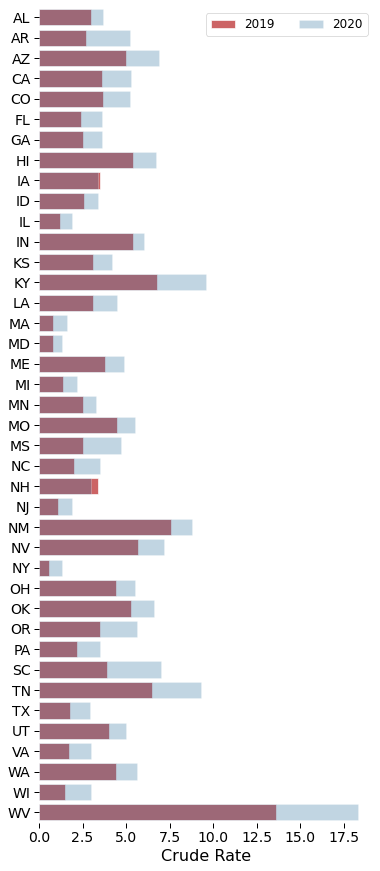

In [47]:
plot_bar_chart("Female")

In [26]:
def plot_bar_chart_race(gender,race):
    
    df_1 = pd.read_csv("T43.6_MCD_drug_induced_race.csv",delimiter="\t")
    df_1 = df_1.replace("Suppressed",np.nan)
    df_1 = df_1.replace("Unreliable",np.nan)
    df_1 = df_1[df_1["Year"] == float(2019)]
    df_1 = df_1[df_1["Gender"] == "%s"%gender]
    df_1 = df_1[df_1["Single Race 6"] == "%s"%race]
    df_1 = df_1[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_1[["Deaths","Crude Rate"]] = df_1[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_1 = pd.Series(df_1["State"]).map(us_state_to_abbrev).to_numpy()

    df_2 = pd.read_csv("T43.6_MCD_drug_induced_race.csv",delimiter="\t")
    df_2 = df_2.replace("Suppressed",np.nan)
    df_2 = df_2.replace("Unreliable",np.nan)
    df_2 = df_2[df_2["Year"] == float(2020)]
    df_2 = df_2[df_2["Gender"] == "%s"%gender]
    df_2 = df_2[df_2["Single Race 6"] == "%s"%race]
    df_2 = df_2[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_2[["Deaths","Crude Rate"]] = df_2[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_2 = pd.Series(df_2["State"]).map(us_state_to_abbrev).to_numpy()
    
    df_1 = df_1.reset_index(drop=True)
    df_2 = df_2.reset_index(drop=True)

    df = pd.DataFrame()
    
    state_codes = set(state_codes_1).intersection(set(state_codes_2))
    
    not_states = [x for x in states_list if x not in list(state_codes)]
    
    print([us_abbrev_to_state[x] for x in not_states])
    
    data_2019 = [float(df_1[df_1["State"] == us_abbrev_to_state[state]]["Crude Rate"]) for state in state_codes]
    data_2020 = [float(df_2[df_2["State"] == us_abbrev_to_state[state]]["Crude Rate"]) for state in state_codes]
    
    df["2019 data"] = data_2019
    df["2020 data"] = data_2020
    df["states"] = state_codes

    df = df.sort_values('states')
    
    sns.set_context('paper')
    
    f, ax = plt.subplots(figsize = (6,15))
    sns.set_color_codes('pastel')
    sns.barplot(x = '2019 data', y = 'states', data = df,
                label = '2019', color = 'tab:red', edgecolor = 'w', alpha=0.8)
    #sns.set_color_codes('muted')
    sns.barplot(x = '2020 data', y = 'states', data = df,
                label = '2020', color = 'tab:blue', edgecolor = 'w',alpha=0.3)
    ax.legend(ncol = 2, loc = 'upper right',fontsize=12)
    ax.set_xlabel("Crude Rate",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_ylabel("")
    sns.despine(left = True, bottom = True)
    plt.savefig("T43.6_MCD_drug_induced_barchart_%s_%s.svg"%(gender,race)) 
    plt.show()

['District of Columbia', 'North Dakota', 'Rhode Island', 'South Dakota', 'Vermont']


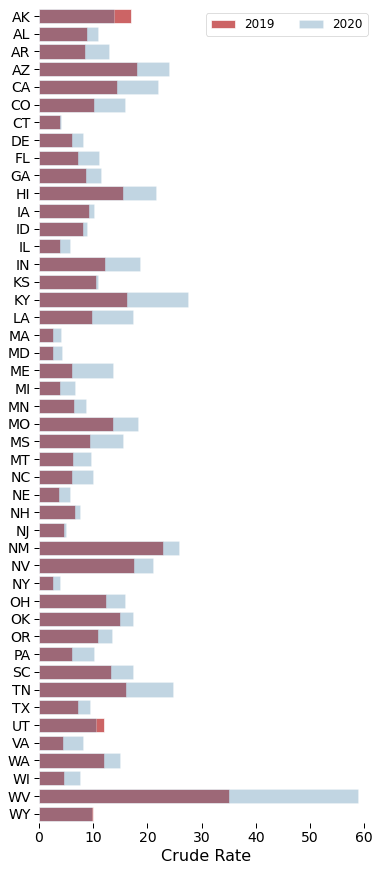

In [28]:
plot_bar_chart_race("Male", "White")